In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd #data preprocessing
import numpy as np #linear algebra 

In [7]:
import warnings ## to avoid warning messages
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Load the Data

In [8]:
covid=pd.read_csv("/content/drive/MyDrive/COVID-19_Case_Surveillance_Public_Use_Data.csv/COVID-19_Case_Surveillance_Public_Use_Data.csv")

# To check if any null values

In [9]:
covid.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [11]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
%%time
covid.head()

CPU times: user 177 µs, sys: 25 µs, total: 202 µs
Wall time: 208 µs


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


## **Shape of the dataset**

In [13]:
covid.shape

(8405079, 11)

# To check unique values in each columns of the dataset

In [14]:
covid.nunique()

cdc_report_dt                    321
pos_spec_dt                      313
onset_dt                         338
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

# drop columns which are not significant

In [15]:
covid= covid.drop(['pos_spec_dt','onset_dt'],axis =1)

# drop rows having missing values

In [16]:
covid=covid.dropna()

In [17]:
covid.isnull().sum() ##check if any null values present

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [18]:
covid.shape

(8404990, 9)

In [19]:
covid.describe()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8404990,8404990,8404990,8404990,8404990,8404990,8404990,8404990,8404990
unique,321,2,5,10,9,4,4,4,4
top,2020/06/24,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155856,7910037,4340898,1635264,2781165,3502508,6178240,3690765,6063360


In [19]:
colums = ['current_status', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn','icu_yn', 'death_yn', 'medcond_yn']
for col in colums:
    print(col)
    print(covid[colums].value_counts())
    print("______________________")

current_status


To request implementation, send an email to feature_requests@modin.org.


current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

current_status             sex      age_group      Race and ethnicity (combined)  hosp_yn  icu_yn   death_yn  medcond_yn
Laboratory-confirmed case  Female   20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       106485
                           Male     20 - 29 Years  Unknown                        Missing  Missing  Missing   Missing       103285
                                    30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        88420
                           Female   30 - 39 Years  Unknown                        Missing  Missing  Missing   Missing        85402
                                    40 - 49 Years  Unknown                        Missing  Missing  Missing   Missing        79194
                                                                                                                             ...  
                           Unknown  10 - 19 Years  White, Non-Hispanic            No       No

In [20]:
covid.describe().T

,count,unique,top,freq
cdc_report_dt,8404990,321,2020/06/24,155856
current_status,8404990,2,Laboratory-confirmed case,7910037
sex,8404990,5,Female,4340898
age_group,8404990,10,20 - 29 Years,1635264
Race and ethnicity (combined),8404990,9,Unknown,2781165
hosp_yn,8404990,4,No,3502508
icu_yn,8404990,4,Missing,6178240
death_yn,8404990,4,No,3690765
medcond_yn,8404990,4,Missing,6063360


In [38]:
#Unique values in data
covid.nunique()

cdc_report_dt                    321
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

# **Some Interesting Insights from Visualization**

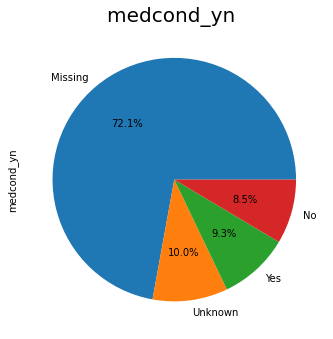

In [39]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('medcond_yn ',fontsize = 20)
covid['medcond_yn'].value_counts().plot.pie(autopct="%1.1f%%")

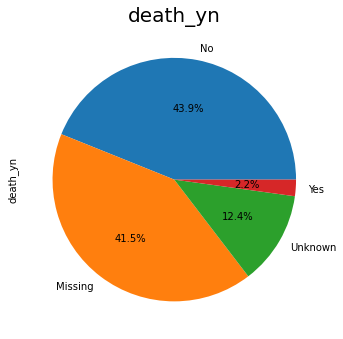

In [41]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('death_yn',fontsize = 20)
covid['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

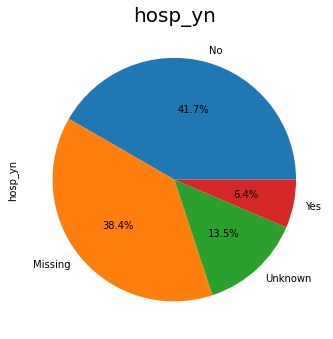

In [42]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('hosp_yn',fontsize = 20)
covid['hosp_yn'].value_counts().plot.pie(autopct="%1.1f%%")

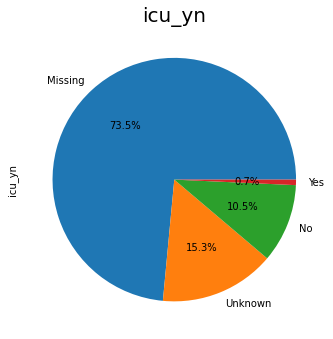

In [43]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('icu_yn',fontsize = 20)
covid['icu_yn'].value_counts().plot.pie(autopct="%1.1f%%")

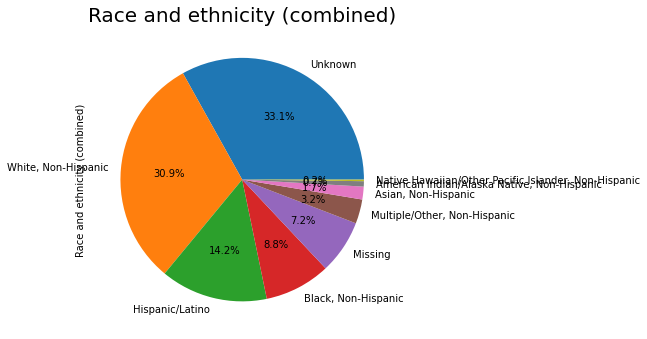

In [44]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Race and ethnicity (combined)',fontsize = 20)
covid['Race and ethnicity (combined)'].value_counts().plot.pie(autopct="%1.1f%%")

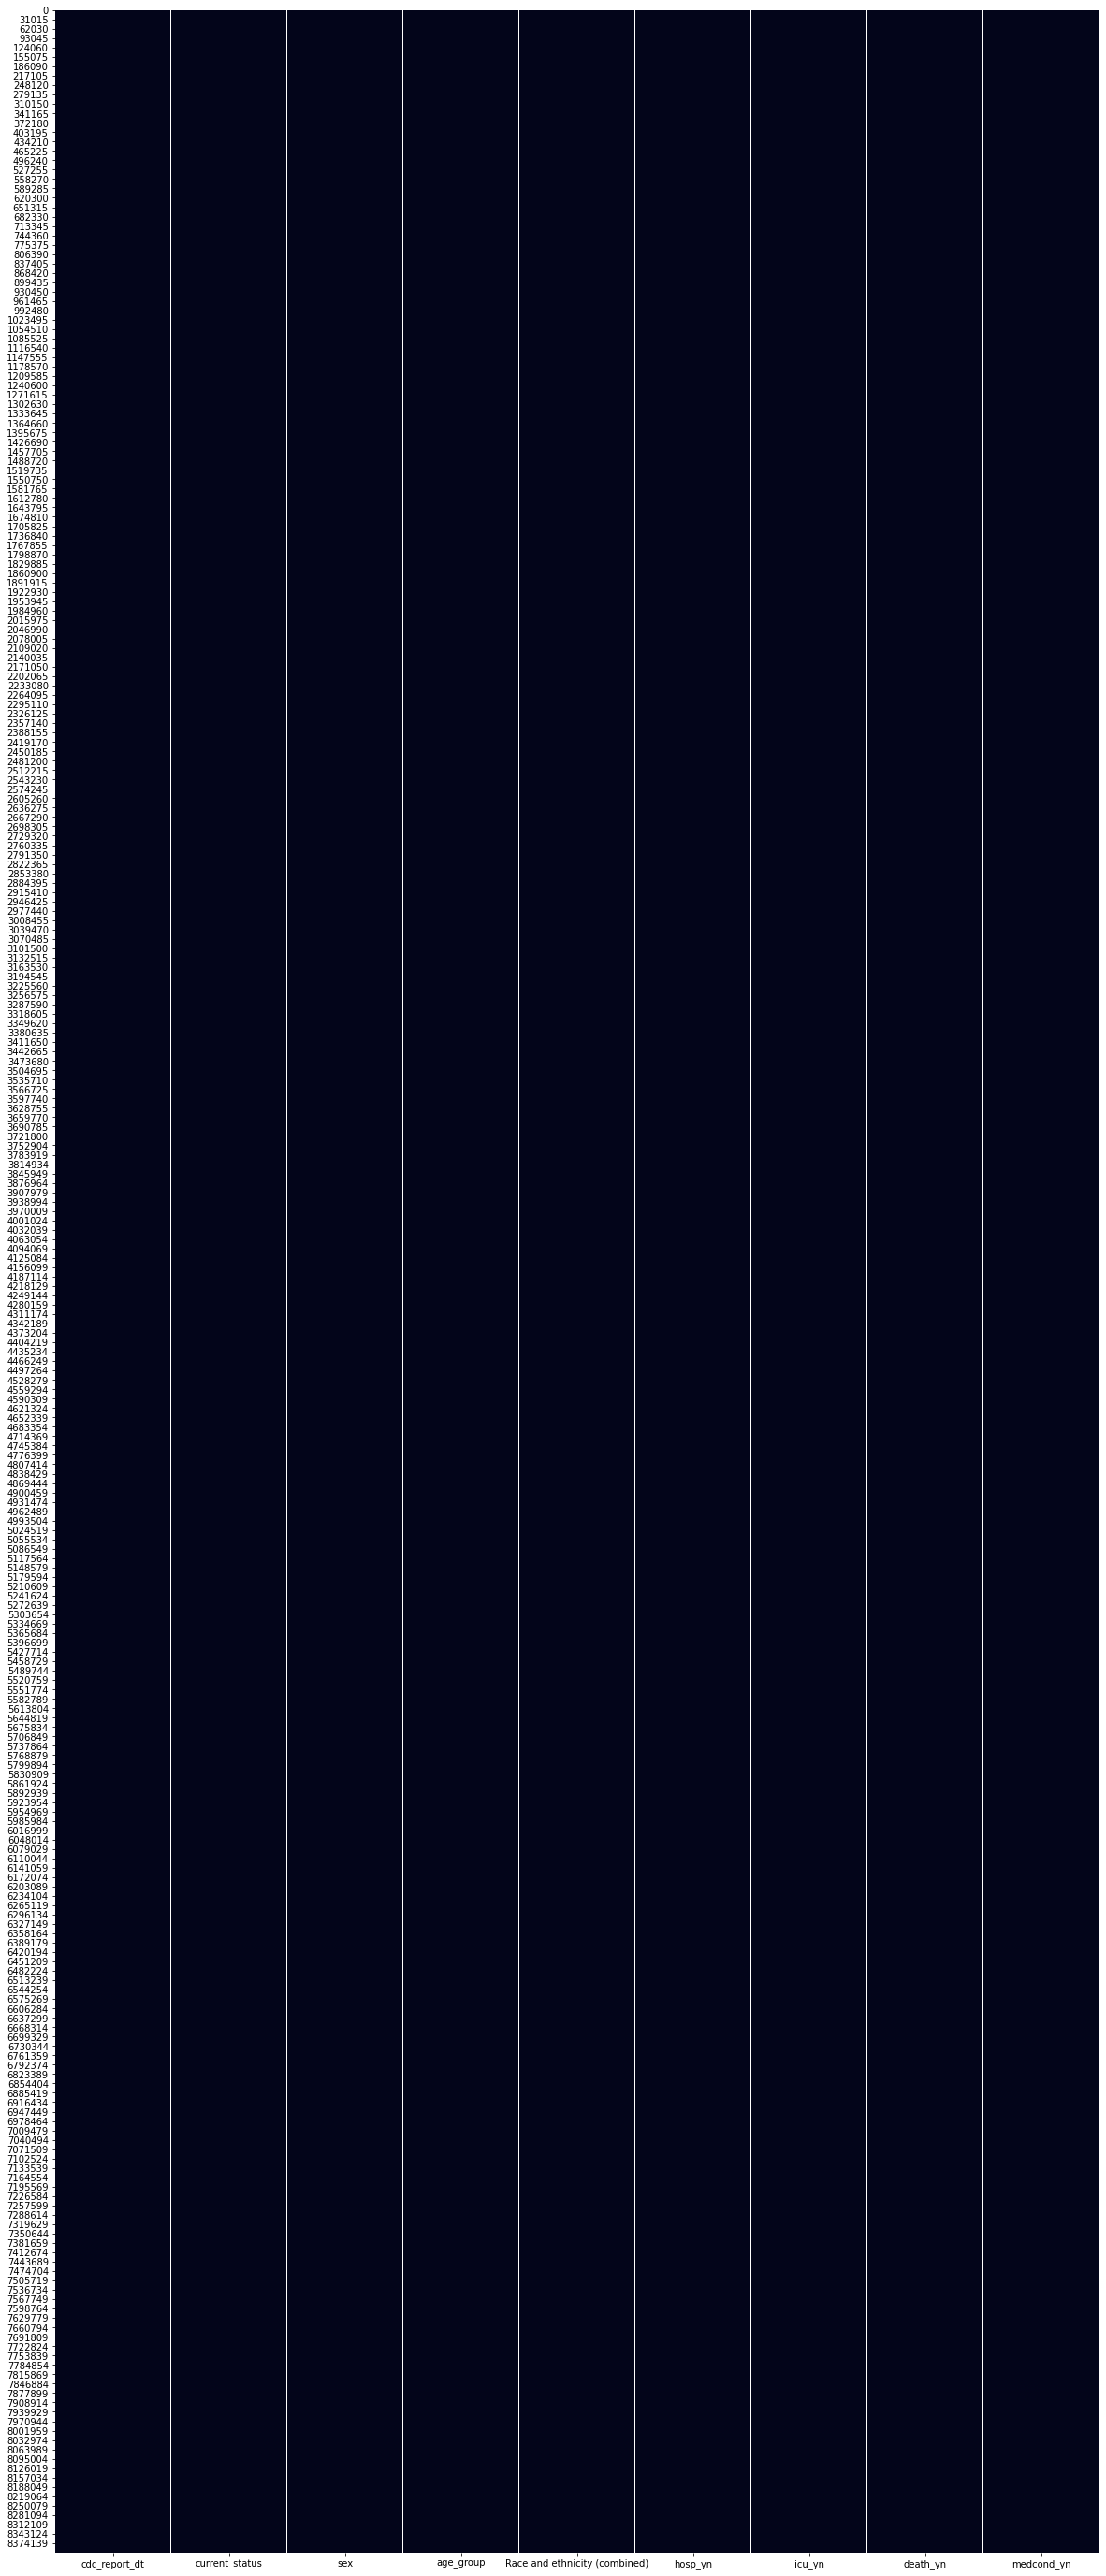

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20, 50))
sns.heatmap(covid.isnull(), cbar=False)

In [46]:
print("Start Date:", covid['cdc_report_dt'].min())
print("End Date:", covid['cdc_report_dt'].max())

Start Date: 2020/01/01
End Date: 2020/11/19


In [47]:
covid['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

# Data Preparation For Model

In [20]:
data = covid.copy()

In [21]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

# Converting categorical feature to numeric¶

In [22]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [23]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

**converting Sex feature to a new feature called Gender where female=0 and male=1**

In [24]:
# mapp = {'Female':1,'Male':2,'Unknown':3,'Missing':4,'Other':5}
# data['sex'] = data['sex'].apply(lambda x:mapp[x])

data['sex'] = data['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})
print(data.head())


  cdc_report_dt             current_status  sex  ...   icu_yn death_yn medcond_yn
0    2020/11/10  Laboratory-confirmed case    1  ...  Unknown       No         No
1    2020/11/14  Laboratory-confirmed case    1  ...       No       No         No
2    2020/11/19  Laboratory-confirmed case    1  ...       No       No         No
3    2020/11/14  Laboratory-confirmed case    1  ...  Missing       No    Missing
4    2020/11/13  Laboratory-confirmed case    1  ...       No       No        Yes

[5 rows x 9 columns]


In [25]:
data["current_status"] = lb_make.fit_transform(data["current_status"])
data["hosp_yn"] = lb_make.fit_transform(data["hosp_yn"])
data["icu_yn"] = lb_make.fit_transform(data["icu_yn"])
data["death_yn"] = lb_make.fit_transform(data["death_yn"])
data["medcond_yn"] = lb_make.fit_transform(data["medcond_yn"])

In [26]:
data.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,0,1,10 - 19 Years,"Black, Non-Hispanic",1,2,1,1
1,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
2,2020/11/19,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
3,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",0,0,1,0
4,2020/11/13,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,3


In [27]:
covid.shape

(8404990, 9)

**Define X and y**

In [28]:
X =  data[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = data['death_yn']

**Train test split**

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic regresssion

In [58]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

73.29

#XG Boost

In [59]:
##XGBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)


[16:29:50] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

77.77

#Decision tree

In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

78.07